**KUIS 2 - STATISTIK KOMPUTASI**

---

**NAMA : M. MUIZZUDDIN RIFQI (15)**

**KELAS : TI-2E**










In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from scipy import stats

# Soal 1

Rata-rata konsentrasi kolesterol darah pada populasi dalam jumlah besar pria dewasa usia 50-60 tahun
adalah 200mg/dl dengan simpangan baku 20mg/dl. Dianggap pengukuran kolesterol bersebaran
normal. Berapakah peluang bahwa 100 pria dari kelompok umum ini akan memiliki kolesterol di
bawah 204 ml/dl?
(25 poin)

In [19]:
import math

def calculate_probability(mean, std_dev, threshold, sample_size):
    z = (threshold - mean) / (std_dev / math.sqrt(sample_size))
    probability = stats.norm.cdf(z)
    return probability

mean = 200
std_dev = 20
threshold = 204
sample_size = 100

probability = calculate_probability(mean, std_dev, threshold, sample_size)
probability_persentase = calculate_probability(mean, std_dev, threshold, sample_size) * 100
print("Peluang 100 pria dari kelompok umum ini akan memiliki kolesterol di bawah 204 mg/dl:", probability)
print("Peluang 100 pria dari kelompok umum ini akan memiliki kolesterol di bawah 204 mg/dL: {:.2f}%".format(probability_persentase))

Peluang 100 pria dari kelompok umum ini akan memiliki kolesterol di bawah 204 mg/dl: 0.9772498680518208
Peluang 100 pria dari kelompok umum ini akan memiliki kolesterol di bawah 204 mg/dL: 97.72%


# Soal 2

Misalkan spesies tanaman tertentu dengan populasi tidak diketahui (sangat banyak) memiliki varians
tinggi 16 cm. Diambil sampel sebanyak 25 secara acak kemudian diperoleh rata-rata tingginya adalah
15 cm. Hitunglah rentang nilai rata-rata populasi dari tinggi tanaman tersebut dengan tingkat
kepercayaan 95%.
(25 poin)

In [4]:
n = 25  
sample_mean = 15  
population_variance = 16  
confidence_level = 0.95  # tingkat kepercayaan (95%)

alpha = 1 - confidence_level
df = n - 1  # derajat kebebasan
critical_value = stats.t.ppf(1 - alpha/2, df)

margin_of_error = critical_value * (population_variance**0.5) / (n**0.5)
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print("Rentang nilai rata-rata populasi: [{:.2f}, {:.2f}]".format(lower_bound, upper_bound))


Rentang nilai rata-rata populasi: [13.35, 16.65]


# Soal 3

Dalam sebuah penelitian, dilakukan eksperimen terhadap dua buah kelompok untuk mengetahui
dampak penggunaan tool pembelajaran. Berikut merupakan dari sampel yang mengikuti eksperimen.

----- data -----



In [24]:
# Read Data
path = "dataHasilBelajar1.csv"

df = pd.read_csv(path)
df.head()

,No,Dengan Tool,Tanpa Tool
0,1,32,29
1,2,31,30
2,3,32,27
3,4,32,28
4,5,33,26


# Soal 3a

Tentukan simpangan baku untuk kelompok “dengan tool”! (5 poin)

In [27]:
std_with_tool = np.std(df['Dengan Tool'], ddof=1)

print("Simpangan Baku: ", std_with_tool)

Simpangan Baku:  1.9315199276138029


# Soal 3b

Tentukan simpangan baku untuk kelompok “tanpa tool”! (5 poin)

In [26]:
std_without_tool = np.std(df['Tanpa Tool'], ddof=1)

print("Simpangan Baku: ", std_without_tool) 

Simpangan Baku:  1.931519927613803


# Soal 3c

Apakah kedua kelompok tersebut homogen? Lengkapi jawaban Anda dengan hasil
analisis dengan menggunakan Uji Harley. (10 poin)

In [10]:
group1 = df['Dengan Tool']
group2 = df['Tanpa Tool']

variance_group1 = stats.variation(group1, ddof=1)
variance_group2 = stats.variation(group2, ddof=1)

variance_ratio = variance_group1 / variance_group2

harley_statistic = (variance_ratio - 1) / 2

alpha = 0.05
df1 = len(group1) - 1
df2 = len(group2) - 1
critical_value = stats.f.ppf(1 - alpha, df1, df2)

if harley_statistic < critical_value:
    result = "Kedua kelompok homogen"
else:
    result = "Kedua kelompok tidak homogen"

print("Hasil analisis Uji Harley: ", result)

Hasil analisis Uji Harley:  Kedua kelompok homogen


# Soal 4

Terdapat sebuah data kondisi cuaca di daerah Szeged, Hongaria tahun 2006 – 2016. Data direkam
pada internal setiap satu jam sekali. Sebagai seorang analis data, Anda diminta untuk memastikan
bahwa data ini baik karena teman Anda akan melakukan permodelan regresi linier untuk memprediksi
cuaca ke depan. Tugas Anda adalah,

In [28]:
# Read Data
path = "weatherHistory.csv"

df = pd.read_csv(path)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# Soal 4a

Gunakan uji KS untuk menentukan apakah atribut “Temprature” terdistribusi secara
normal. Anda diminta untuk menggunakan p-value sebesar 0.05. Apakah “Temperature”
terdistribusi normal? Berapa nilai KS-nya? (10 poin)

In [29]:
temperature_data = df['Temperature (C)']
ks_statistic, p_value = stats.kstest(temperature_data, 'norm')

alpha = 0.05
if p_value > alpha:
    print("Temperature terdistribusi secara normal")
else:
    print("Temperature tidak terdistribusi secara normal")

print("Nilai KS: ", ks_statistic)

Temperature tidak terdistribusi secara normal
Nilai KS:  0.8187651455395293


# Soal 4b

Buatlah histogram dari “Temprature” untuk memastikan nilai yang Anda dapat dari poin
a. (5 poin)

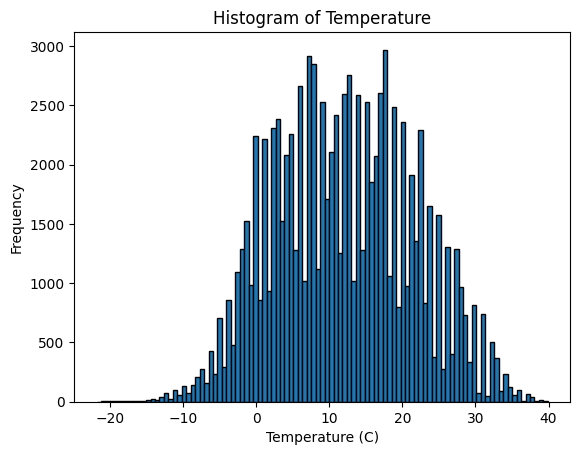

In [30]:
temperature_data = df['Temperature (C)']

plt.hist(temperature_data, bins='auto', edgecolor='black')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')

plt.show()

# Soal 4c

Gunakan uji KS untuk menentukan apakah atribut “Humidity” terdistribusi secara normal.
Tingkat kepercayaan yang diinginkan adalah 99%. Apakah “Humidity” terdistribusi
normal? Berapa nilai KS-nya? (10 poin)

In [31]:
humidity_data = df["Humidity"]
ks_statistic, p_value = stats.kstest(humidity_data, 'norm')

alpha = 0.01  # Tingkat signifikansi 1% (99% kepercayaan)
if p_value > alpha:
    print("Humidity terdistribusi secara normal")
else:
    print("Humidity tidak terdistribusi secara normal")

print("Nilai KS: ", ks_statistic)

Humidity tidak terdistribusi secara normal
Nilai KS:  0.5990171816042561


# Soal 4d

Buatlah histogram dari “Humidity” untuk memastikan apakah nilai yang dapat dari poin
c. (5 poin)

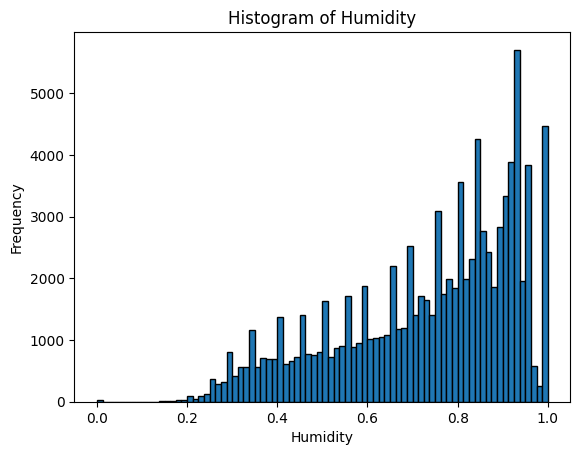

In [32]:
humidity_data = df["Humidity"]

plt.hist(humidity_data, bins='auto', edgecolor='black')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Histogram of Humidity')

plt.show()